<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Linear Regression 1D: Training One Parameter</h1>


<h2>Objective</h2><ul><li> How to create cost or criterion function using MSE (Mean Square Error).</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will train a model with PyTorch by using data that you created. The model only has one parameter: the slope.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function (Total Loss)</a></li>
    <li><a href="#Train">Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>20 min</strong></p>

<hr>


<h2>Preparation</h2>


The following are the libraries we are going to use for this lab.


In [25]:
# These are the libraries will be used for this lab.

import numpy as np
import matplotlib.pyplot as plt

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [26]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()
       
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
  
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


Import PyTorch library:


In [27]:
# Import the library PyTorch

import torch

Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will estimate.


In [28]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

Let us plot the line.


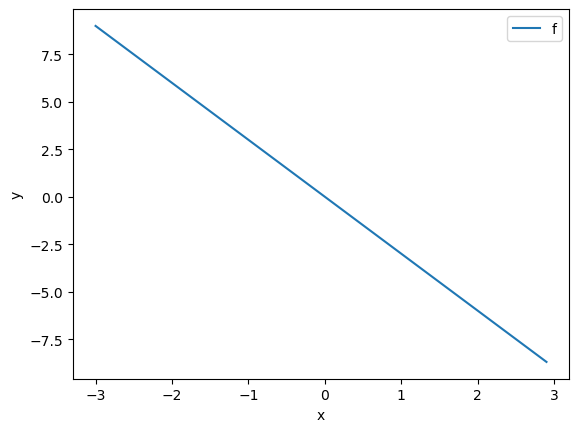

In [29]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use <code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation opf 0.1.


In [30]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

Plot the <code>Y</code>: 


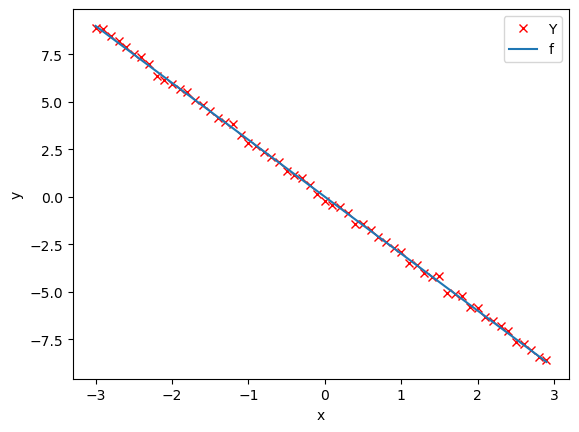

In [31]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>


In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.


First, define the <code>forward</code> function $y=w*x$. (We will add the bias in the next lab.)


In [32]:
# Create forward function for prediction

def forward(x):
    return w * x

Define the cost or criterion function using MSE (Mean Square Error): 


In [33]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Define the learning rate <code>lr</code> and an empty list <code>LOSS</code> to record the loss for each iteration:   


In [34]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

Now, we create a model parameter by setting the argument <code>requires_grad</code> to <code> True</code> because the system must learn it.


In [35]:
w = torch.tensor(-10.0, requires_grad = True)

Create a <code>plot_diagram</code> object to visualize the data space and the parameter space for each iteration during training:


In [36]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<class 'numpy.ndarray'>


<!--Empty Space for separating topics-->


<h2 id="Train">Train the Model</h2>


Let us define a function for training the model. The steps will be described in the comments.


In [37]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

Let us try to run 4 iterations of gradient descent:  


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


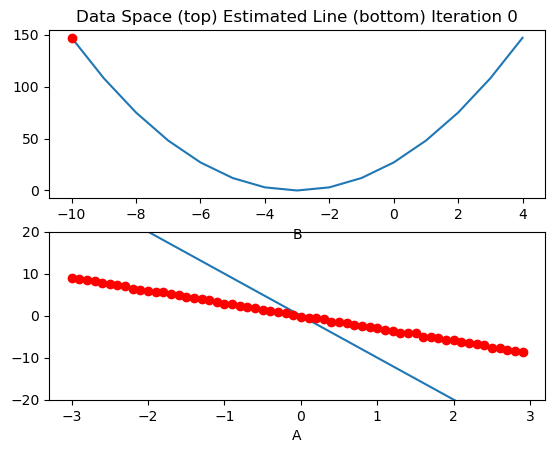

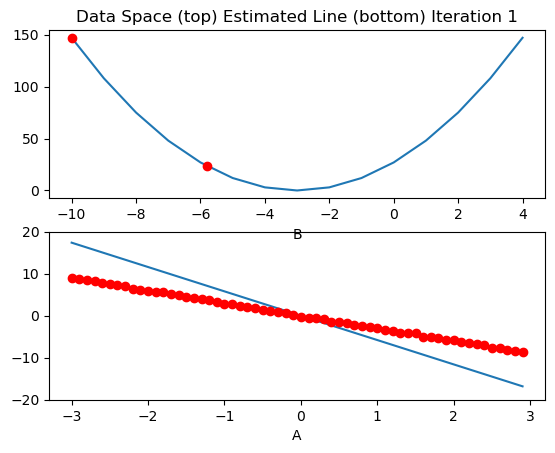

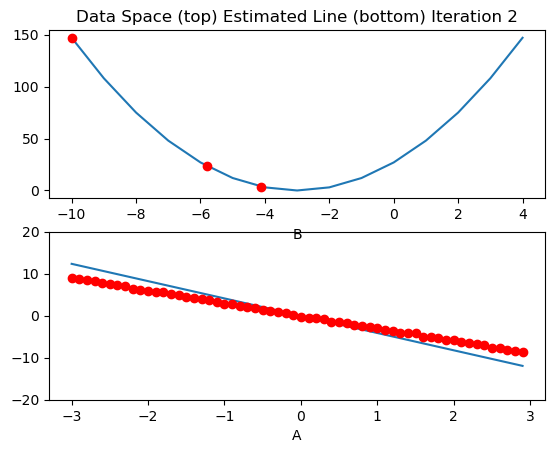

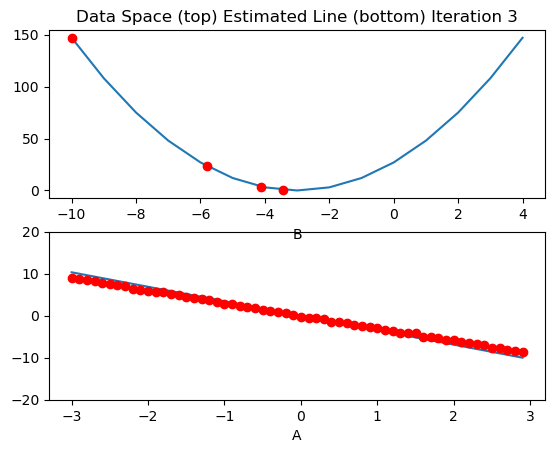

<Figure size 640x480 with 0 Axes>

In [38]:
# Give 4 iterations for training the model here.

train_model(4)

Plot the cost for each iteration: 


Text(38.097222222222214, 0.5, 'Cost')

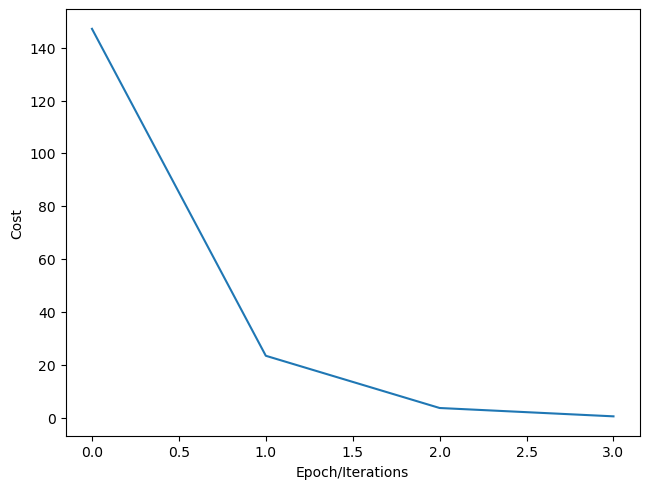

In [39]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<!--Empty Space for separating topics-->


<h3>Practice</h3>


Create a new learnable parameter <code>w</code> with an initial value of -15.0.


In [40]:
# Practice: Create w with the inital value of -15.0

# Type your code here
w = torch.tensor(-15.0, requires_grad=True)

Double-click <b>here</b> for the solution.
<!-- Your answer is below:
w = torch.tensor(-15.0, requires_grad=True)
-->


<!--Empty Space for separating topics-->


Create an empty list <code>LOSS2</code>:


In [41]:
# Practice: Create LOSS2 list

# Type your code here
LOSS2 = []

Double-click <b>here</b> for the solution.
<!-- Your answer is below:
LOSS2 = []
-->


<!--Empty Space for separating topics-->


Write your own <code>my_train_model</code> function with loss list <code>LOSS2</code>. And run it with 4 iterations.


<class 'numpy.ndarray'>


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


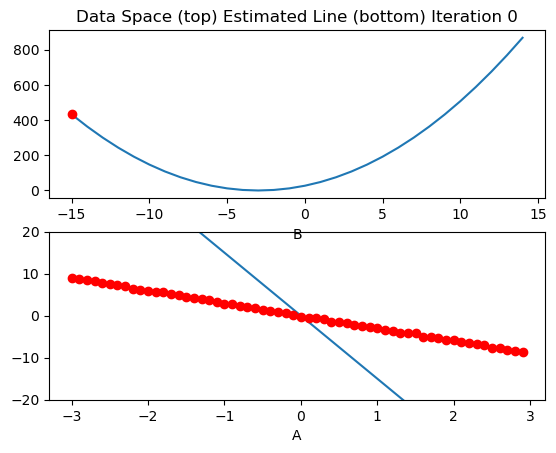

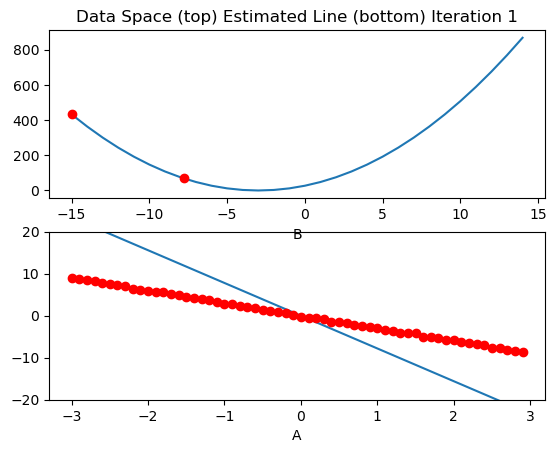

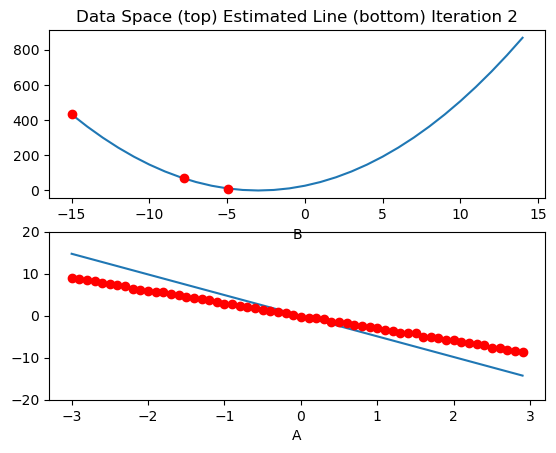

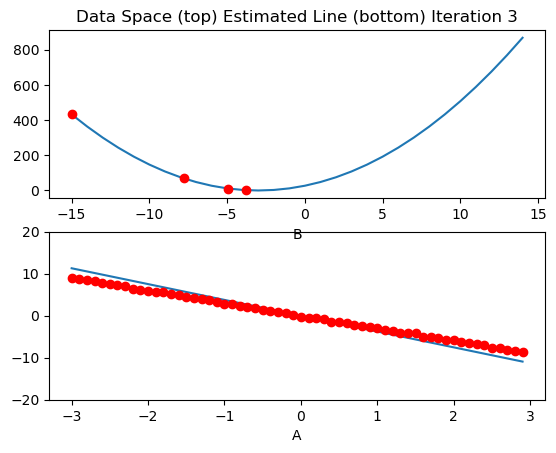

<Figure size 640x480 with 0 Axes>

In [42]:
# Practice: Create your own my_train_model

gradient_plot1 = plot_diagram(X, Y, w, stop = 15)

def my_train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        gradient_plot1(Yhat, w, loss.item(), epoch)
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
my_train_model(4)

Double-click <b>here</b> for the solution.

<!-- Your answer is below:

def my_train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        gradient_plot1(Yhat, w, loss.item(), epoch)
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
my_train_model(4)
    -->


<!--Empty Space for separating topics-->


Plot an overlay of the list <code>LOSS2</code> and <code>LOSS</code>. 


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

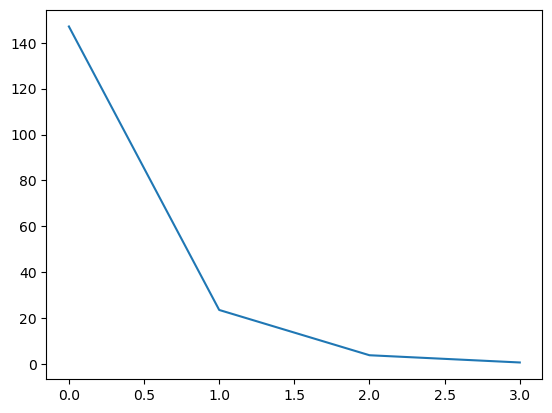

In [43]:
# Practice: Plot the list LOSS2 and LOSS

# Type your code here
plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()
-->


<!--Empty Space for separating topics-->


What does this tell you about the parameter value? 


Double-click <b>here</b> for the solution.

<!-- Your answer is below:
the parameter value is sensitive to initialization  
    -->



<a href="https://dataplatform.cloud.ibm.com/registration/stepone?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork&context=cpdaas&apps=data_science_experience%2Cwatson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"></a>


<!--Empty Space for separating topics-->


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |
-->


<hr>





## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
